<a href="https://colab.research.google.com/github/duongnhathuy/A_I/blob/main/FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dương Nhật Huy - 20146125

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 24.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=cad5428ae245094a1d6e255a922bbda00f43ed8f59cd6bf40ab228950a06a26d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


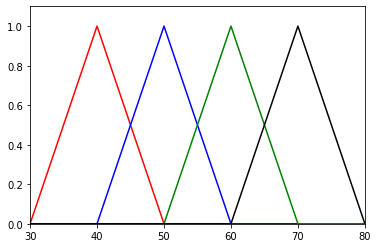

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
arr = np.arange(30, 81, 1)
slow = fuzz.trimf(arr, [30, 40, 50])
medium = fuzz.trimf(arr, [40, 50, 60])
medium_fast = fuzz.trimf(arr, [50, 60, 70])
fall_speed = fuzz.trimf(arr, [60, 70, 80])
plt.figure()
plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

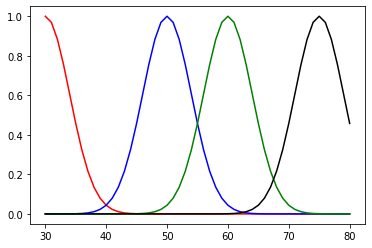

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
arr = np.arange(30, 81, 1)
slow = fuzz.gaussmf(arr, 30, 4)
medium = fuzz.gaussmf(arr, 50, 4)
medium_fast = fuzz.gaussmf(arr, 60, 4)
fall_speed = fuzz.gaussmf(arr, 75, 4)
plt.figure()
# plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

COOK RICE


Power used to cook rice: 95.00000000000004 %


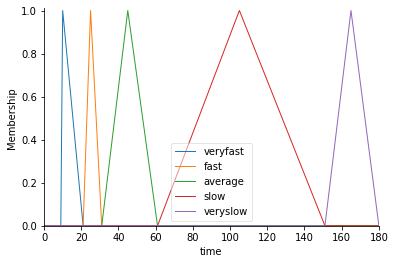

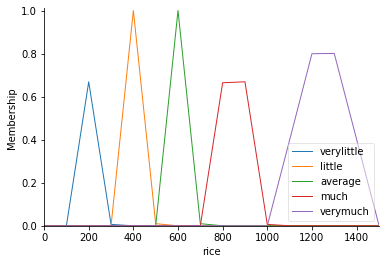

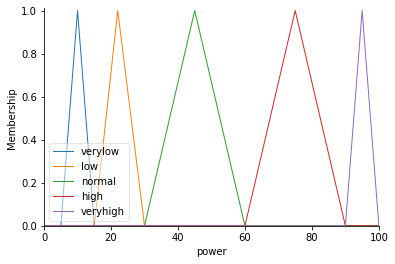

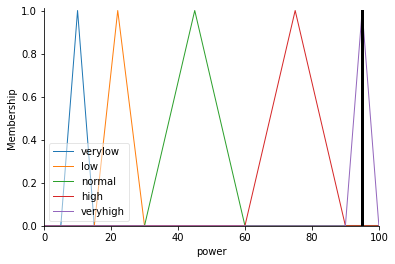

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

time = ctrl.Antecedent(np.arange(0, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(0, 1600, 100), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['veryfast'] = fuzz.trimf(time.universe, [10, 10, 21])
time['fast'] = fuzz.trimf(time.universe, [21, 25, 31])
time['average'] = fuzz.trimf(time.universe, [31, 45, 61])
time['slow'] = fuzz.trimf(time.universe, [61, 105, 151])
time['veryslow'] = fuzz.trimf(time.universe, [151, 165, 180])

rice['verylittle'] = fuzz.trimf(rice.universe, [100, 150, 301])
rice['little'] = fuzz.trimf(rice.universe, [301, 400, 501])
rice['average'] = fuzz.trimf(rice.universe, [501, 600, 701])
rice['much'] = fuzz.trimf(rice.universe, [701, 850, 1001])
rice['verymuch'] = fuzz.trimf(rice.universe, [1001, 1250, 1501])

power['verylow'] = fuzz.trimf(power.universe, [5, 10, 15])
power['low'] = fuzz.trimf(power.universe, [15, 22, 30])
power['normal'] = fuzz.trimf(power.universe, [30, 45, 60])
power['high'] = fuzz.trimf(power.universe, [60, 75, 90])
power['veryhigh'] = fuzz.trimf(power.universe, [90, 95, 100])

time.view()
rice.view()
power.view()

rule1 = ctrl.Rule(time['veryfast'] & rice['verylittle'], power['verylow'])
rule2 = ctrl.Rule(time['veryfast'] & rice['little'], power['low'])
rule3 = ctrl.Rule(time['veryfast'] & rice['average'], power['normal'])
rule4 = ctrl.Rule(time['veryfast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['veryfast'] & rice['verymuch'], power['veryhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['verylittle'], power['verylow'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['normal'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['verymuch'], power['veryhigh'])

rule11 = ctrl.Rule(time['average'] & rice['verylittle'], power['low'])
rule12 = ctrl.Rule(time['average'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['normal'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['verymuch'], power['veryhigh'])

rule16 = ctrl.Rule(time['slow'] & rice['verylittle'], power['high'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['verymuch'], power['high'])

rule21 = ctrl.Rule(time['veryslow'] & rice['verylittle'], power['veryhigh'])
rule22 = ctrl.Rule(time['veryslow'] & rice['little'], power['high'])
rule23 = ctrl.Rule(time['veryslow'] & rice['average'], power['veryhigh'])
rule24 = ctrl.Rule(time['veryslow'] & rice['much'], power['veryhigh'])
rule25 = ctrl.Rule(time['veryslow'] & rice['verymuch'], power['veryhigh'])


power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7,
                                 rule8, rule9, rule10, rule11, rule12,rule13, 
                                 rule14, rule15, rule16, rule17, rule18, rule19,
                                 rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['time'] = 30
powering.input['rice'] = 1500
powering.compute()

print('Power used to cook rice: {} %'.format(powering.output['power']))

power.view(sim=powering)